In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.ensemble import IsolationForest

Creamos artificialmente un conjunto de datos junto con un potencial outlier

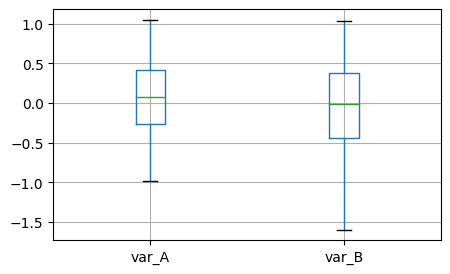

In [3]:
# Generar un blob con 100 puntos y 1 centro
X, _ = make_blobs(n_samples=100, centers=[[0,0]], cluster_std=0.5, random_state=20)
# Agregar un outlier (por ejemplo, un punto alejado del centro del blob)
outlier = np.array([[1, -1.5]])  # Punto fuera del rango del blob
X_with_outlier = np.vstack([X, outlier])  # Combinar los puntos con el outlier
df = pd.DataFrame(X_with_outlier, columns=['var_A', 'var_B'])
plt.figure(figsize=(5,3))
df.boxplot(return_type='axes', figsize=(10,5))
plt.show()

Bajo análisis individual no se observa ningún outlier en los datos  

In [4]:

# Graficar el blob y el outlier
col_names = ["var_A", "var_B"]
col_index = [df.columns.get_loc(name) for name in col_names]
col_index_var_a = df.columns.get_loc("var_A")
col_index_var_b = df.columns.get_loc("var_B")


Marcamos el outlier para tener una idea de donde está.

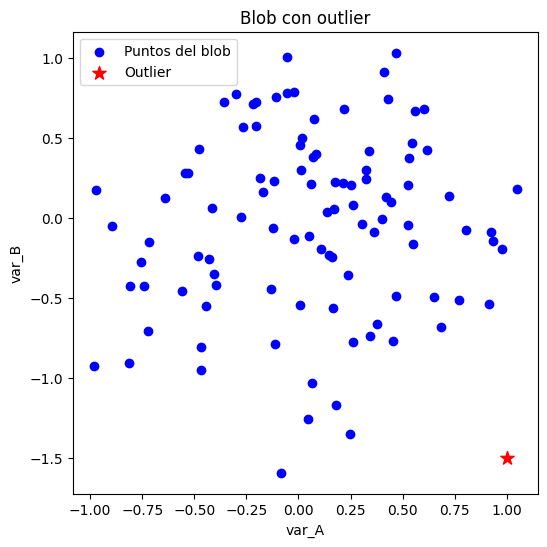

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:-1,col_index_var_a], df.iloc[:-1, col_index_var_b], color='blue', label='Puntos del blob')
plt.scatter(df.iloc[-1,col_index_var_a], df.iloc[-1,col_index_var_b], color='red', label='Outlier', marker='*', s=100)

# Configurar el gráfico
plt.xlabel('var_A')
plt.ylabel('var_B')
plt.title('Blob con outlier')
plt.legend()
plt.show()


Intentamos detectarlo via IsolationForest

In [93]:
clf = IsolationForest(contamination=1/100, n_estimators=300)
clf.fit(df[['var_A', 'var_B']])
df["is_anomaly"] = clf.predict(df[['var_A', 'var_B']])
df["is_anomaly"] = df["is_anomaly"].map({1: 0, -1: 1})


Analizamos los resultados via una exploración visual

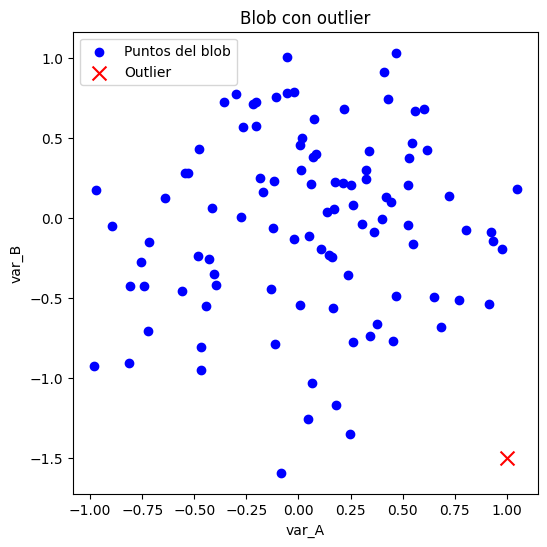

In [95]:
df_anomalies = df[df["is_anomaly"] == 1]
df_nominal = df[df["is_anomaly"] == 0]

plt.figure(figsize=(6,6))
plt.scatter(df_nominal["var_A"], df_nominal["var_B"], color='blue', label='Puntos del blob')
plt.scatter(df_anomalies["var_A"], df_anomalies["var_B"], color='red', label='Outlier', marker='x', s=100)


# Configurar el gráfico
plt.xlabel('var_A')
plt.ylabel('var_B')
plt.title('Blob con outlier')
plt.legend()
plt.show()

IsolationForest encontro el outlier.
